<a href="https://colab.research.google.com/github/salman-118114/Cafe_Sales_EDA/blob/main/EDA_cafe_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAFE SALES - EDA

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salman118114","key":"ac683c74610eea8264b625ee139b658e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training


Dataset URL: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training
License(s): CC-BY-SA-4.0
cafe-sales-dirty-data-for-cleaning-training.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip cafe-sales-dirty-data-for-cleaning-training.zip


Archive:  cafe-sales-dirty-data-for-cleaning-training.zip
replace dirty_cafe_sales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dirty_cafe_sales.csv    


# first look into data set and take some valuable information about the dataSet

In [ ]:
import pandas as pd

def insert_raw_data():


  df = pd.read_csv("dirty_cafe_sales.csv")


  # Preview
  print("🔍 Preview of dataset:")
  display(df.head())

  print("\nℹ️ Dataset info:")
  df.info()

  #get rows and column count
  rows, cols = df.shape
  print(f"\n📐 Dataset contains {rows:,} rows and {cols} columns.")

  #get count of missing values in each column
  missing = df.isnull().sum()
  print("\n🚨 Missing values per column:")
  print(missing[missing > 0] if missing.sum() > 0 else "no missing values")

  #descriptive satistics
  print('\n Descriptive statistics')
  print(df.describe())

  #  ✅ Local function
  def insert_column(df,column):
    for col in column:
      print(f"\n🔎 Unique values in '{col}':")
      print(df[col].value_counts(dropna=False))

  # ✅ Call it INSIDE the main function
  Categorical_cols = ['Transaction ID','Item','Payment Method','Location']
  Numerical_cols = ['Quantity','Price Per Unit','Total Spent']
  id_cols = ['Transaction Date']

  insert_column(df,Categorical_cols)
  insert_column(df,Numerical_cols)
  insert_column(df,id_cols)

# Create a clean, independent copy of the raw dataset for data cleaning
df_raw = pd.read_csv("dirty_cafe_sales.csv").copy()

# Define column groups for reuse outside the function
Categorical_cols = ['Transaction ID','Item','Payment Method','Location']
Numerical_cols = ['Quantity','Price Per Unit','Total Spent']
id_cols = ['Transaction Date']













In [ ]:
insert_raw_data()

🔍 Preview of dataset:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11



ℹ️ Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

📐 Dataset contains 10,000 rows and 8 columns.

🚨 Missing values per column:
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

 Descriptive statistics
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count          

🔍 First Look: Preview of the Dataset¶
The initial preview of the dataset reveals a few early issues:

The column Total Spent contains the value "ERROR" → this should be treated as a missing or invalid value.
The fields Payment Method and Location include "UNKNOWN" → this is a placeholder and should be replaced with NaN.
The column Transaction Date appears to be in a valid date format (YYYY-MM-DD), but still needs to be verified and converted explicitly to datetime.
The numerical columns (Quantity, Price Per Unit, Total Spent) appear consistent at first glance, but further checks are needed to confirm their data types.
These findings guide the next cleaning steps, such as replacing error strings, standardizing missing values, and fixing data types.

🔍 Data Types and Non-Null Overview
The output of df.info() reveals several key issues:

All columns are currently stored as object type, including numerical and date fields. This indicates that:
Columns like Quantity, Price Per Unit, and Total Spent are not yet recognized as numeric.
Transaction Date is not in proper datetime format and must be converted explicitly.
Several columns contain missing values:
Item, Quantity, Price Per Unit, and Total Spent have small gaps.
Payment Method and Location have a substantial number of missing entries.
The dataset contains 10,000 rows and 8 columns in total.
These observations highlight the need for data type correction and handling of missing or placeholder values before any analysis can begin.

🔍 Descriptive Statistics – Observations
The descriptive statistics reveal the following key points:

Missing Values: Several columns have fewer than 10,000 non-null entries, indicating missing or invalid values (e.g., Item, Quantity, Payment Method, Location, Transaction Date).
Placeholders Detected:
"UNKNOWN" appears in Transaction Date and Location – likely used as a placeholder for missing data.
"ERROR" is also expected (not visible here) in Total Spent based on earlier inspection.
Value Distribution:
Item has 10 distinct values, with "Juice" being the most frequent (1,171 times).
Price Per Unit and Total Spent have small sets of distinct values (suggesting price tiers), but need conversion to numeric types.
Data Type Mismatch:
Even though statistics are shown, the data types are still object, so the calculations are limited or based on string interpretation.
These findings support the need for further cleaning: replacing placeholders, converting to proper data types, and handling missing values.

🔍 Missing Values – Column-wise Overview
The missing values summary shows the following:

High missingness in:

Location: 3,265 missing values (≈ 32.7%)
Payment Method: 2,579 missing values (≈ 25.8%)
Moderate missingness in:

Item: 333 missing values
Price Per Unit: 179
Total Spent: 173
Transaction Date: 159
Quantity: 138
🔍 Interpretation:
These missing entries must be treated carefully:
For categorical columns like Location or Payment Method, strategies such as imputation with mode or creating a new category (e.g., "Unknown") may be appropriate.
For numeric columns like Quantity or Price Per Unit, logical inference (e.g., using Total Spent = Quantity × Price) or statistical imputation (mean/median) can be applied.
Transaction Date should be parsed as datetime, and missing values can be either imputed or excluded, depending on the analysis goal.
Handling missing values will be a key step before type conversion and feature engineering.

🔍 Unique Value Observations by Column
Transaction ID

All 10,000 entries are unique (1 per row) → serves as a valid identifier.
No missing or duplicate values detected.
Item

10 expected food items present (e.g., Juice, Coffee, etc.).
"UNKNOWN", "ERROR", and NaN are present → clear placeholders or invalid entries.
Cleaning required: replace placeholders and handle missing values.
Payment Method

Major categories: Digital Wallet, Credit Card, Cash.
High number of NaN (2,579) and placeholders ("UNKNOWN", "ERROR") → needs standardization and imputation strategy.
Location

Main values: Takeaway, In-store.
3,265 missing values and many placeholders → over 30% of data affected.
Quantity

Numeric values from 1 to 5 are expected and dominant.
UNKNOWN, ERROR, and NaN exist → must be cleaned and converted to numeric.
Price Per Unit

Mostly clean price tiers (1.0 to 5.0 and 1.5), but "ERROR", "UNKNOWN" and NaN appear.
Needs type conversion after cleaning.
Total Spent

Wide variety of numeric values (e.g., 2.0, 4.0, 6.0, etc.).
"ERROR", "UNKNOWN" and NaN exist → clean before analysis.
Also useful for validating Price × Quantity.
Transaction Date

Most values are proper dates (YYYY-MM-DD), but "UNKNOWN", "ERROR" and NaN appear (all in similar frequency).
Needs conversion to datetime after cleaning placeholders.
Overall, all columns except Transaction ID require cleaning to remove placeholder strings ("UNKNOWN", "ERROR") and handle missing (NaN) values before type conversion and analysis.

## data cleaning steps

1. Standardize Placeholder Values¶
Replace all occurrences of "UNKNOWN" and "ERROR" across all columns with np.nan, so that missing data is properly recognized.

Affects: Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date
2. Convert Data Types
Ensure that each column has the appropriate data type:

Convert Quantity, Price Per Unit, and Total Spent to numeric (float), using pd.to_numeric(..., errors="coerce")
Convert Transaction Date to datetime using pd.to_datetime(..., errors="coerce")
3. Handle Missing Values
Decide how to deal with remaining NaN values:

Categorical columns (Item, Payment Method, Location):

Do not impute using the mode (most frequent value), as this could distort later analysis.
Instead, replace all missing values with a neutral placeholder: "Unknown".
This preserves the data structure while maintaining interpretability and avoiding assumptions.
Numeric columns (Quantity, Price Per Unit, Total Spent):

Use logical inference where possible: Total Spent = Quantity × Price Per Unit
Otherwise, impute remaining missing values with the median.
Transaction Date:

Drop rows with missing or unparseable dates, unless date-based grouping is required later.

4. Validating Logical Relationships and Value Ranges
To validate the logical consistency and value ranges of your data, you can perform a series of checks using the pandas library in Python.

Check Logical Consistency: Total Spent ≈ Quantity × Price Per Unit
To check the logical relationship between the Total Spent, Quantity, and Price Per Unit columns, you can set a tolerance for rounding errors.

Calculate the expected value: Create a new column that contains the product of Quantity and Price Per Unit.

Set the tolerance: Define a small threshold (e.g., 0.01) to ignore minor rounding differences.

Find inconsistent rows: Use a mask to identify rows where the difference between the actual Total Spent and the calculated value exceeds the set tolerance.

Flag or clean: You can either flag these rows or remove them directly from the DataFrame, depending on your requirements.

Validate Value Ranges (Range Checks)
For value range validation, you must ensure that the values in the relevant columns meet the specified conditions.

Quantity > 0: Quantities should be greater than zero.

Price Per Unit >= 0: Prices per unit should not be negative.

Total Spent >= 0: The total spent should not be negative.

You can create a boolean mask to find all rows that don't meet these conditions.

5. Validate Key Uniqueness¶
Check if key columns (e.g. Transaction ID) are unique Use: df["Transaction ID"].duplicated().sum()

Why it matters:

-Primary keys must be unique (e.g. transactions, orders)

-Unexpected duplicates may indicate data issues

-Combined keys (e.g. User ID + Timestamp) should also be tested

Optional: Drop duplicates if they are not meaningful

6. Final Check¶\
Confirm that no placeholder strings remain
Ensure correct data types using df.dtypes
Check for duplicates using df.duplicated().sum()
Ensure row count consistency after drops/imputations





In [ ]:
# 1. standardize placeholder values

def replace_palceholders(df, columns, placeholders=['UNKNOWN','ERROR']):

  #creating a copy
  df_cleaned = df.copy()

  #counting number of place holder in each column

  for col in columns:
    count = df[col].isin(placeholders).sum()
    print(f'{col}: replaced {count} placeholders')

  import numpy as np
  #Replace place holders with nan
  df_cleaned[columns] = df[columns].replace(placeholders, np.nan)

  return df_cleaned

In [ ]:
df_step1 = replace_palceholders(df_raw,columns=Categorical_cols + Numerical_cols)

Transaction ID: replaced 0 placeholders
Item: replaced 636 placeholders
Payment Method: replaced 599 placeholders
Location: replaced 696 placeholders
Quantity: replaced 341 placeholders
Price Per Unit: replaced 354 placeholders
Total Spent: replaced 329 placeholders


In [ ]:
print(df_step1[df_step1['Item'] == 'ERROR'])

Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [ ]:
#2 convert data type of columns

def convert_data_types(df, Numerical_cols,id_cols):

  #creating a copy
  df_converted = df.copy()

  #convert the categorical to numeric
  for col in Numerical_cols:
    df_converted[col] = pd.to_numeric(df_converted[col],errors='coerce') #here errors= coerce convert any invalid values to nan

  #converting cetegorical to datetime
  for col in id_cols:
    df_converted[col] = pd.to_datetime(df_converted[col],errors='coerce')

  #printing columns data types after convertion
  print(df_converted.dtypes)

  return df_converted


In [ ]:
#step-2
df_step2 = convert_data_types(df_step1,Numerical_cols,id_cols)

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [ ]:
# Step 3 - Handle Missing Values

def handle_missing_values(df, numeric_cols, categorical_cols, id_cols):
    # Create a copy
    df_cleaned = df.copy()

    print("\nHandling missing categorical values...")
    # Fill missing categorical values with 'Unknown'
    for col in categorical_cols:
        missing_before = df_cleaned[col].isna().sum()
        df_cleaned[col] = df_cleaned[col].fillna("Unknown")
        missing_after = df_cleaned[col].isna().sum()
        print(f"  {col}: filled {missing_before - missing_after} missing values with 'Unknown'")

    # Try to infer 'Total Spent' if Quantity and Price Per Unit are available
    if {'Total Spent', 'Quantity', 'Price Per Unit'}.issubset(df_cleaned.columns):
        print("\nInferring 'Total Spent' from Quantity × Price Per Unit...")
        mask = df_cleaned['Total Spent'].isna()
        inferred_count = mask.sum()
        df_cleaned.loc[mask, 'Total Spent'] = (
            df_cleaned.loc[mask, 'Quantity'] * df_cleaned.loc[mask, 'Price Per Unit']
        )
        print(f"  Filled {inferred_count} missing values in 'Total Spent'.")

    # Fill remaining missing numeric values with the median
    print("\nFilling remaining missing numeric values with median...")
    for col in numeric_cols:
        missing = df_cleaned[col].isna().sum()
        if missing > 0:
            median_val = df_cleaned[col].median()
            df_cleaned[col] = df_cleaned[col].fillna(median_val)
            print(f"  {col}: filled {missing} values with median = {median_val:.2f}")

    # Drop rows with missing or invalid dates
    for id_col in id_cols:
      if id_col in df_cleaned.columns:
          rows_before = len(df_cleaned)
          df_cleaned = df_cleaned.dropna(subset=[id_col])
          rows_after = len(df_cleaned)
          print(f"\nDropped {rows_before - rows_after} rows with missing or invalid '{id_col}'.")

    return df_cleaned

In [ ]:
df_cleaned = handle_missing_values(df_step2,Numerical_cols,Categorical_cols,id_cols)


Handling missing categorical values...
  Transaction ID: filled 0 missing values with 'Unknown'
  Item: filled 969 missing values with 'Unknown'
  Payment Method: filled 3178 missing values with 'Unknown'
  Location: filled 3961 missing values with 'Unknown'

Inferring 'Total Spent' from Quantity × Price Per Unit...
  Filled 502 missing values in 'Total Spent'.

Filling remaining missing numeric values with median...
  Quantity: filled 479 values with median = 3.00
  Price Per Unit: filled 533 values with median = 3.00
  Total Spent: filled 40 values with median = 8.00

Dropped 460 rows with missing or invalid 'Transaction Date'.


In [ ]:
# Step 4 – Validate logical relationships and range checks
def validate_logic_and_ranges(df, tolerance=0.01):
    """
    Validate logical consistency and value ranges in the DataFrame.

    Parameters:
    df (pd.DataFrame): Input cleaned DataFrame
    tolerance (float): Acceptable rounding difference between expected and actual 'Total Spent'

    Returns:
    pd.DataFrame: DataFrame with flagged inconsistencies removed or marked
    """
    df_checked = df.copy()

    # Logical consistency: Total Spent ≈ Quantity × Price Per Unit (within rounding tolerance)
    df_checked["Expected Total"] = df_checked["Quantity"] * df_checked["Price Per Unit"]
    df_checked["Logical Match"] = (abs(df_checked["Total Spent"] - df_checked["Expected Total"]) <= tolerance)

    # Range checks
    df_checked["Valid Quantity"] = df_checked["Quantity"] > 0
    df_checked["Valid Price"] = df_checked["Price Per Unit"] >= 0
    df_checked["Valid Total"] = df_checked["Total Spent"] >= 0

    # Optional: Count number of issues
    print("Logical mismatches:", (~df_checked["Logical Match"]).sum())
    print("Invalid Quantity values:", (~df_checked["Valid Quantity"]).sum())
    print("Invalid Price values:", (~df_checked["Valid Price"]).sum())
    print("Invalid Total Spent values:", (~df_checked["Valid Total"]).sum())

    # Keep only fully valid rows
    valid_rows = (
        df_checked["Logical Match"]
        & df_checked["Valid Quantity"]
        & df_checked["Valid Price"]
        & df_checked["Valid Total"]
    )

    df_validated = df_checked[valid_rows].drop(columns=[
        "Expected Total", "Logical Match", "Valid Quantity", "Valid Price", "Valid Total"
    ])

    print(f"Remaining valid rows: {df_validated.shape[0]} of {df.shape[0]}")
    return df_validated


In [ ]:
df_step4 = validate_logic_and_ranges(df_cleaned)

Logical mismatches: 735
Invalid Quantity values: 0
Invalid Price values: 0
Invalid Total Spent values: 0
Remaining valid rows: 8805 of 9540


In [ ]:
# Step 5 – Check uniqueness of expected key columns
def check_unique_keys(df, keys, drop_duplicates=False):
    """
    Check whether specified columns contain only unique values.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    keys (list): List of column names expected to be unique (e.g., ['Transaction ID'])
    drop_duplicates (bool): If True, drop duplicate rows based on key(s)

    Returns:
    tuple: (filtered DataFrame, dictionary with column name and duplicate count)
    """

    # Dictionary to collect number of duplicates per key column
    duplicate_report = {}

    # Iterate over all specified keys
    for col in keys:
        # Check if column exists
        if col not in df.columns:
            print(f"⚠️ Column '{col}' not found in DataFrame.")
            continue

        # Count number of duplicates (excluding the first occurrence)
        num_duplicates = df[col].duplicated().sum()

        # Print result and optionally drop duplicates
        if num_duplicates > 0:
            print(f"❌ Column '{col}' has {num_duplicates} duplicate entries.")
            duplicate_report[col] = num_duplicates

            # Optional: drop duplicates if requested
            if drop_duplicates:
                initial_count = df.shape[0]
                df = df[~df[col].duplicated(keep='first')]
                dropped_count = initial_count - df.shape[0]
                print(f"🗑️ Dropped {dropped_count} duplicate rows based on '{col}'. Remaining rows: {df.shape[0]}")
        else:
            print(f"✅ Column '{col}' is unique.")

    # Return cleaned DataFrame and report
    return df, duplicate_report

In [ ]:
df_step5,dup_report = check_unique_keys(df_step4,keys=["Transaction ID"],drop_duplicates=True)

✅ Column 'Transaction ID' is unique.


In [ ]:
# Final Check¶

def Final_check(df,unique_keys):
  '''
  Final validation: check for missing/error values, duplicate keys, and column data types.

    Parameters:
    df (pd.DataFrame): Cleaned DataFrame
    unique_keys (list): Columns expected to have only unique values (e.g. ['Transaction ID'])

    Returns:
    None
    '''

  print("🔍 Final Data Quality Check\n")

  # 1. Check for NaNs and 'ERROR' values
  print("Missing or 'ERROR' values:")
  error_summary = {}

  for col in df.columns:
    num_nan = df[col].isna().sum()
    num_error = ((df[col] == 'ERROR').sum() if df[col].dtype == 'object' else 0)
    if num_nan > 0 or num_error > 0:
        error_summary[col] = {"NaN": num_nan, "ERROR": num_error}
        print(f"  - {col}: {num_nan} NaN, {num_error} 'ERROR'")

  if not error_summary:
      print("✅ No NaN or 'ERROR' values found.")

  #2 check for duolicates in unique keys
  if unique_keys:
      print("\n🔑 Uniqueness check for key columns:")

      for key in unique_keys:
          if key not in df.columns:
              print(f"⚠️ Column '{key}' not found in DataFrame.")
              continue

          num_dups = df[key].duplicated().sum()
          if num_dups > 0:
              print(f"❌ Column '{key}' has {num_dups} duplicate entries. Consider fixing.")
          else:
              print(f"✅ Column '{key}' is unique.")

  #check for data types
  print("\n📦 Column Data Types:")
  print(df.dtypes)

  # 4. Print shape
  print(f"\n📊 Final shape: {df.shape[0]} rows × {df.shape[1]} columns")
  print("✅ Final check completed.")






In [ ]:
Final_check(df_step5, unique_keys=["Transaction ID"])

🔍 Final Data Quality Check

Missing or 'ERROR' values:
✅ No NaN or 'ERROR' values found.

🔑 Uniqueness check for key columns:
✅ Column 'Transaction ID' is unique.

📦 Column Data Types:
Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

📊 Final shape: 8805 rows × 8 columns
✅ Final check completed.


In [ ]:
import os
from datetime import datetime
def export_cleaned_data(df, filename_base, file_format="csv", versioned=True, output_path="."):
    """
    Export cleaned dataset to CSV or Excel in the given output path.
    """
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S") if versioned else ""
    filename = f"{filename_base}_{timestamp}.{file_format}" if versioned else f"{filename_base}.{file_format}"
    full_path = os.path.join(output_path, filename)

    if file_format == "csv":
        df.to_csv(full_path, index=False)
    elif file_format == "xlsx":
        df.to_excel(full_path, index=False)
    else:
        raise ValueError("❌ Unsupported file format.")

    print(f"✅ File saved to: {full_path}")
    return full_path

In [ ]:
# Step 7 – Export Cleaned Dataset
export_cleaned_data(
    df=df_step5,
    filename_base="final_cleaned_data",
    file_format="csv",  # oder "xlsx"
    versioned=True,
    output_path="outputs/"  # dein Wunschpfad
)

✅ File saved to: outputs/final_cleaned_data_20250824_112841.csv


'outputs/final_cleaned_data_20250824_112841.csv'

Visual EDA & Pattern Detection¶
After successfully cleaning and exporting the dataset, we now move on to the visual exploratory data analysis (EDA). The goal of this step is to use plots and charts to gain deeper insights into distributions, relationships, and potential outliers in the data.

In this step, we will explore:

Distributions of key variables (e.g., Total Spent, Payment Method)
Correlations between numerical features (e.g., Quantity, Price Per Unit, Total Spent)
Outliers that may indicate errors or unusual cases
Time-based trends, such as changes in sales over time (Transaction Date)
We’ll use visual tools such as:

histplot(), boxplot(), countplot() for distributions
heatmap() and pairplot() for correlation analysis
Time series plots to explore temporal patterns

# Distribution Analysis of Key Columns¶
Let’s examine the distributions of both categorical and numerical columns to identify trends, dominant categories, and irregularities.

For categorical features like Item, Payment Method, and Location, we will use countplot().
For numerical features like Quantity, Price Per Unit, and Total Spent, we’ll use histograms and boxplots to understand the spread and detect outliers.

In [ ]:
import matplotlib.pyplot as plt  # Plotting and charting
import seaborn as sns # Statistical data visualization

<Figure size 1600x1000 with 0 Axes>

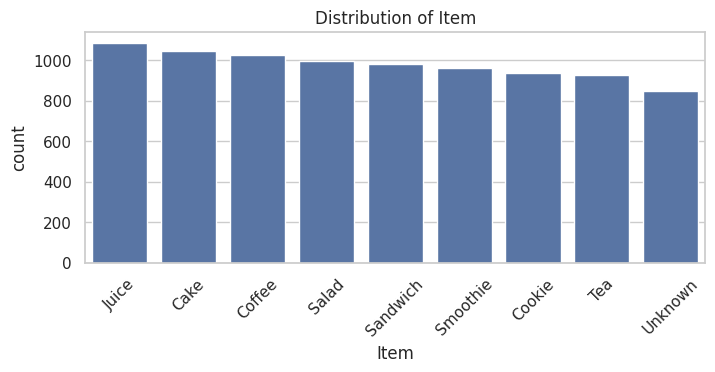

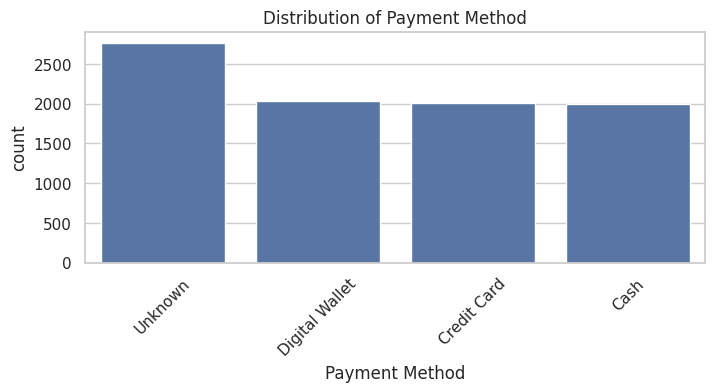

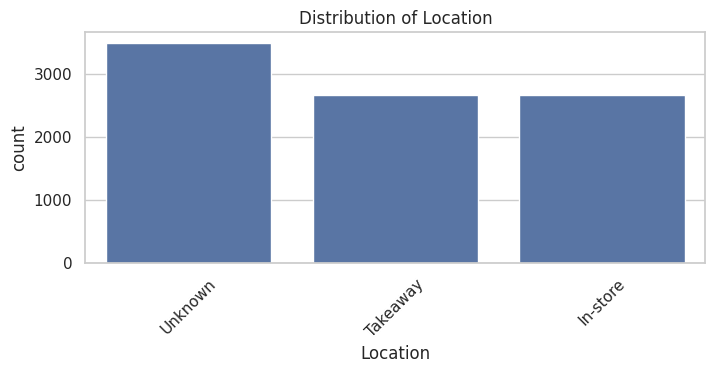

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

#visuvalization for categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
  plt.figure(figsize=(8,3))
  sns.countplot(data=df_step5,x=col,order=df_step5[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
  plt.show()

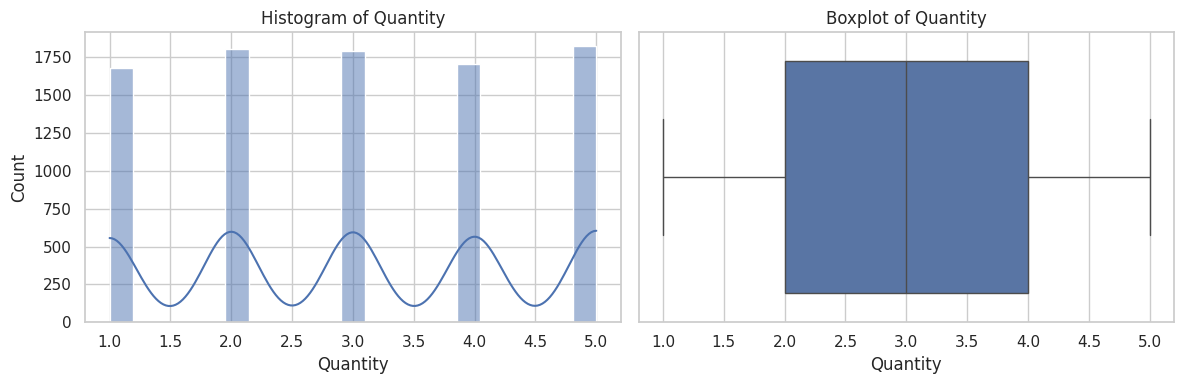

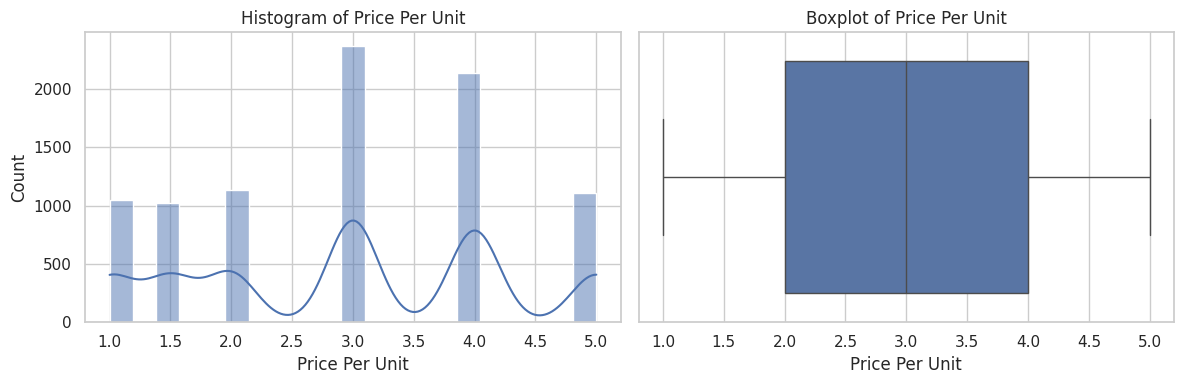

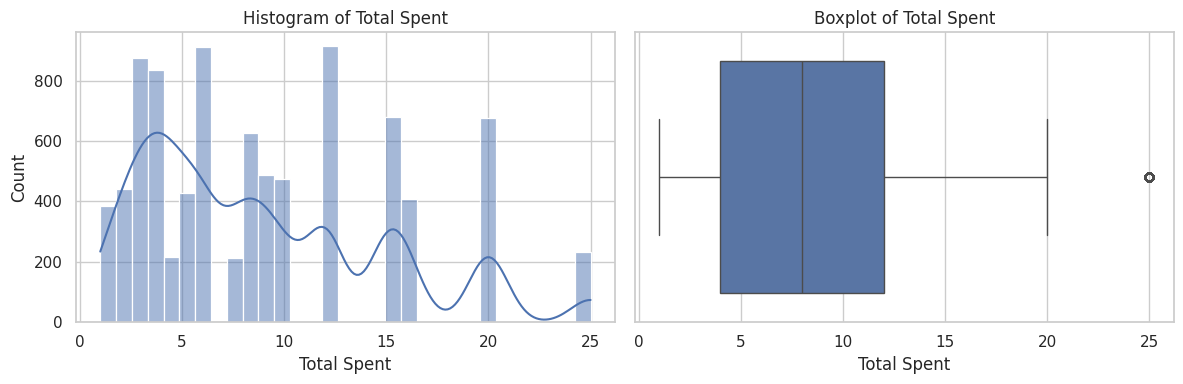

In [ ]:
#numerical columns distribution
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numerical_cols:
  plt.figure(figsize=(12, 4))

  #histogram
  plt.subplot(1,2,1)
  sns.histplot(data=df_step5,x=col,kde=True)
  plt.title(f"Histogram of {col}")

  #Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(data=df_step5, x=col)
  plt.title(f"Boxplot of {col}")

  plt.tight_layout()
  plt.show()

Correlation Analysis (Numerical Features)¶\
In this step, we examine how strongly numerical variables like Quantity, Price Per Unit, and Total Spent are related to each other. This helps us detect patterns such as whether higher prices lead to more or fewer sales, or whether spending is primarily driven by quantity.

We'll use a heatmap to visualize the correlation matrix, which ranges from -1 (strong negative) to 1 (strong positive correlation).

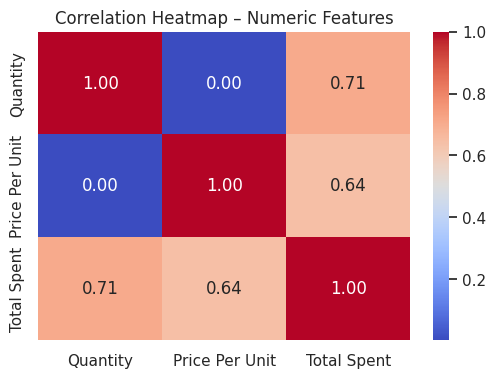

In [ ]:
corre_matrix = df_step5[['Quantity', 'Price Per Unit', 'Total Spent']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))
sns.heatmap(corre_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap – Numeric Features")
plt.show()

Monthly Sales Trend\
Instead of daily fluctuations, we'll group the data by month to identify broader sales trends. This is helpful to answer questions like:

Are sales increasing month over month?

Is there a seasonal pattern in spending?

In [ ]:
df_step5['YearMonth'] = df_step5['Transaction Date'].dt.to_period('M')
print(df_step5['YearMonth'] )

0       2023-09
1       2023-05
2       2023-07
3       2023-04
4       2023-06
         ...   
9993    2023-10
9994    2023-01
9995    2023-08
9997    2023-03
9999    2023-11
Name: YearMonth, Length: 8805, dtype: period[M]


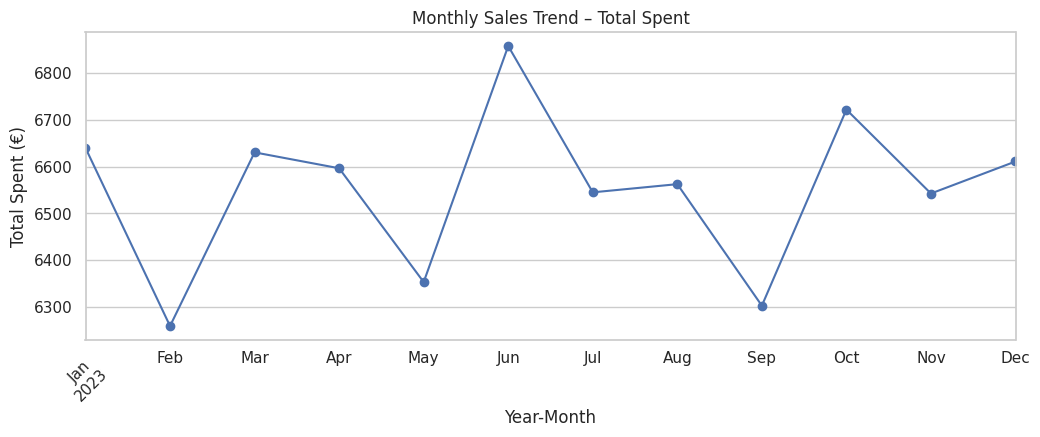

In [ ]:
monthly_sales = df_step5.groupby('YearMonth')['Total Spent'].sum()

#plot
plt.figure(figsize=(12,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend – Total Spent")
plt.xlabel("Year-Month")
plt.ylabel("Total Spent (€)")
plt.xticks(rotation=45)
plt.show()